Diabetic data set prediction:

In [155]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Python-ml/Machine Learning algo/datasets_228_482_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Outcome:
1 = Positive of Diabetes
0 = Negative for Diabetes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Splitting the model:

In [ ]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]
tsize=0.3
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=27,test_size=tsize)

In [ ]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
223,7,142,60,33,190,28.8,0.687,61
461,1,71,62,0,0,21.8,0.416,26
175,8,179,72,42,130,32.7,0.719,36
636,5,104,74,0,0,28.8,0.153,48
349,5,0,80,32,0,41.0,0.346,37
...,...,...,...,...,...,...,...,...
3,1,89,66,23,94,28.1,0.167,21
183,5,73,60,0,0,26.8,0.268,27
652,5,123,74,40,77,34.1,0.269,28
578,10,133,68,0,0,27.0,0.245,36


Preprocessing:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
x1_train=scalar.fit_transform(x_train)
x1_test=scalar.transform(x_test)
print(x1_train)

[[0.35294118 0.43814433 0.68421053 ... 0.56727273 0.13363636 0.45652174]
 [0.23529412 0.56185567 0.56140351 ... 0.63272727 0.37136364 0.10869565]
 [0.35294118 0.63402062 0.63157895 ... 0.61090909 0.29318182 0.2826087 ]
 ...
 [0.23529412 0.43298969 0.78947368 ... 0.71818182 0.03227273 0.08695652]
 [0.17647059 0.87113402 0.64912281 ... 0.54363636 0.08181818 0.2173913 ]
 [0.05882353 0.59278351 0.61403509 ... 0.62909091 0.20045455 0.23913043]]


Model fitting:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=14)
model.fit(x1_train,y_train)
y_pred=model.predict(x1_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

Accuracy of the model's prediction:

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)*100
acc

75.75757575757575

In [154]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred)) 

[[271  31]
 [ 89  66]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       302
           1       0.68      0.43      0.52       155

    accuracy                           0.74       457
   macro avg       0.72      0.66      0.67       457
weighted avg       0.73      0.74      0.72       457



Predicting for a sample:

For a positive case:

In [ ]:
a=[[9,170,74,31,0,44.0,0.403,43]]
a=scalar.transform(a)
b=model.predict(a)
print(b)

[1]


For a negative case:

In [151]:
a=[[1,85,66,29,0,26.6,0.351,31]]
a=scalar.transform(a)
b=model.predict(a)
print(b)

[0]


Variation with k:

Text(0, 0.5, 'accuracy')

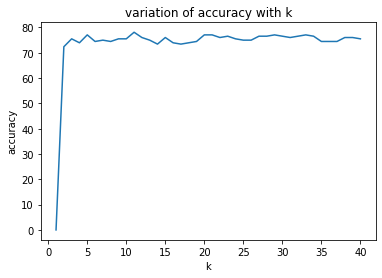

In [207]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=27)
scalar=MinMaxScaler()
x1_train=scalar.fit_transform(x_train)
import numpy as np
accuracy=np.zeros(40)
x1_test=scalar.transform(x_test)
for k in range(1,40):
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(x1_train,y_train)
  y_pred=model.predict(x1_test)
  accuracy[k]=accuracy_score(y_test,y_pred)*100
import matplotlib.pyplot as plt
plt.plot(range(1,41),accuracy)
plt.title('variation of accuracy with k')
plt.xlabel('k')
plt.ylabel('accuracy')

In [208]:
from sklearn.metrics import classification_report
#k=1:
model=KNeighborsClassifier(n_neighbors = 1) 
model.fit(x_train,y_train) 
y_pred=model.predict(x_test) 
print(classification_report(y_test,y_pred),'\n')
#k=14
model=KNeighborsClassifier(n_neighbors = 14) 
model.fit(x_train,y_train) 
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       130
           1       0.59      0.65      0.62        62

    accuracy                           0.74       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.75      0.74      0.74       192
 

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       130
           1       0.68      0.48      0.57        62

    accuracy                           0.76       192
   macro avg       0.73      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192



We can squeeze some more performance out of our model by changing to better k value,
from k=1 to k=14.
